# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

# Optionally, print the list of cities
for city in cities:
    print(city)


Number of cities in the list: 627
edinburgh of the seven seas
thompson
puerto natales
blackfoot
lakhdaria
uturoa
obsharovka
albany
balikpapan
adamstown
bayanhongor
ushuaia
kailua-kona
invercargill
bethel
mahina
tiksi
taoudenni
waitangi
kawm umbu
grytviken
iqaluit
metlili chaamba
bhimunipatnam
port elizabeth
lebu
akbarabad
atafu village
west island
hami
port-aux-francais
tura
blackmans bay
ahlerstedt
rongelap
mazagao
lohaghat
puerto san carlos
dhidhdhoo
yellowknife
kill devil hills
taiohae
severo-yeniseyskiy
ajaccio
somero
tamanrasset
ilulissat
aripuana
minas de marcona
crane
mallammaduri
aasiaat
allegan
dabakala
port saint john's
east london
fauske
fomboni
port alfred
lata
lazaro cardenas
ji'an
pahlgam
utrik
sagaing
olonkinbyen
naracoorte
vilyuchinsk
horta
college
papatowai
ribeira grande
kerikeri
inekar
cambridge
el obeid
zhelezinka
acarau
as sulayyil
iskateley
san carlos del zulia
constantia
carnarvon
shangri-la
ambon
al bawiti
hanzhong
keflavik
bilibino
colonia
at taj
padang
chonchi

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | blackfoot
Processing Record 5 of Set 1 | lakhdaria
Processing Record 6 of Set 1 | uturoa
Processing Record 7 of Set 1 | obsharovka
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | balikpapan
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | bayanhongor
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | kailua-kona
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | mahina
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | taoudenni
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | kawm umbu
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | iqaluit
Processing Reco

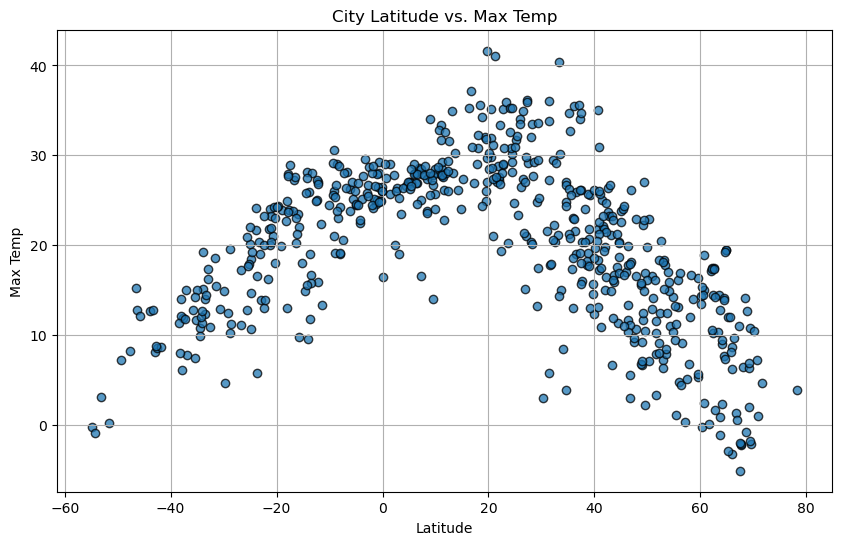

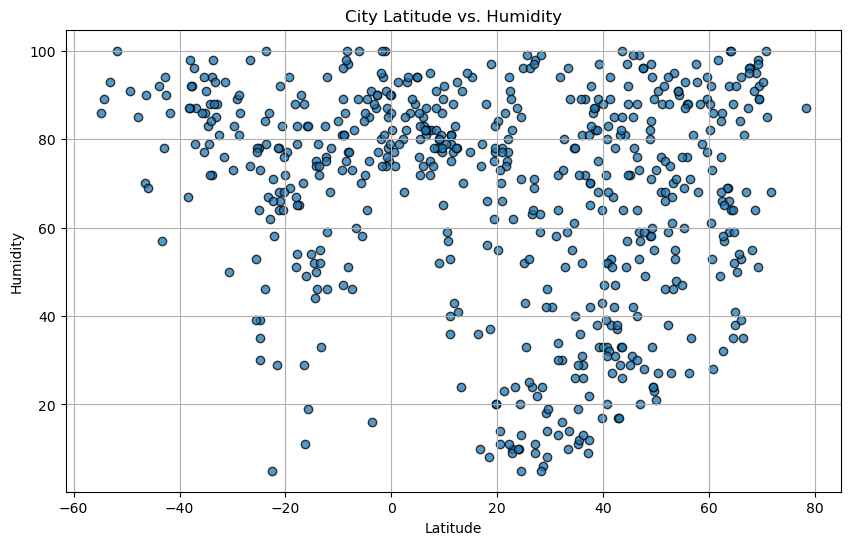

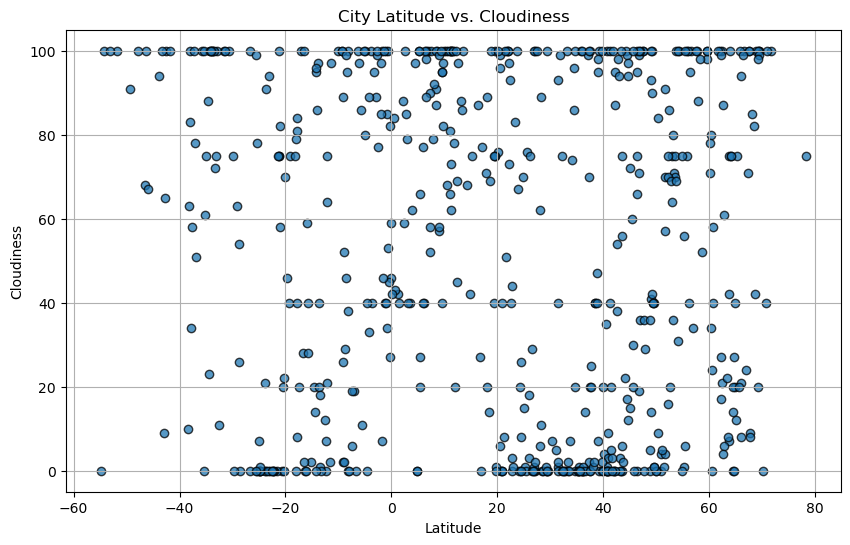

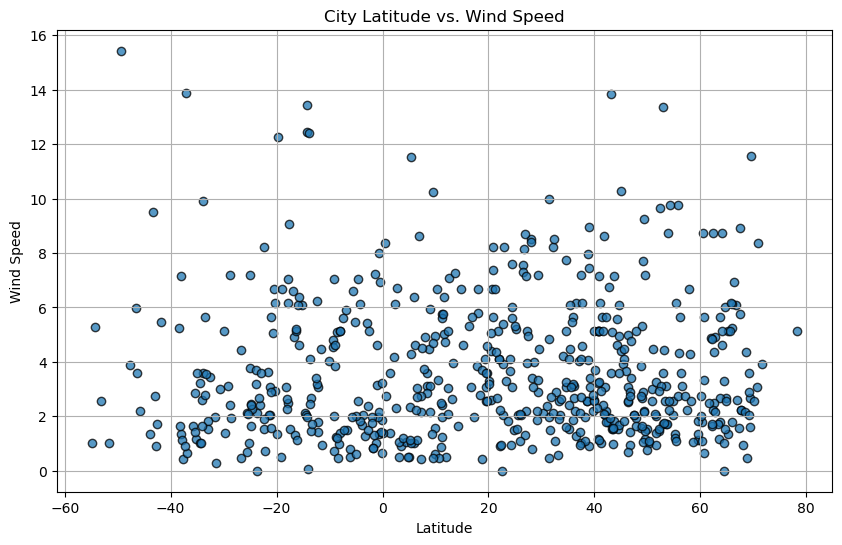

In [4]:

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Display the DataFrame
print(city_data_df.head(10))

# Export the City_Data into a CSV
city_data_df.to_csv("city_data.csv", index_label="City_ID")

# Plotting the Data
# Create scatter plots for each weather variable against latitude
variables = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

for variable in variables:
    plt.figure(figsize=(10, 6))
    plt.scatter(city_data_df["Lat"], city_data_df[variable], edgecolor="k", alpha=0.75)
    plt.title(f"City Latitude vs. {variable}")
    plt.xlabel("Latitude")
    plt.ylabel(variable)
    plt.grid(True)
    plt.savefig(f"City_Latitude_vs_{variable.replace(' ', '_')}.png")
    plt.show()


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df.count()
city_data_df.count()

# Display the DataFrame and Record Count
print(city_data_df.head())
print("\nRecord Count for each column:")
print(record_count)

                          City      Lat       Lng  Max Temp  Humidity  \
0  edinburgh of the seven seas -37.0676  -12.3116     15.05        79   
1                     thompson  55.7435  -97.8558     13.09        76   
2               puerto natales -51.7236  -72.4875      0.25       100   
3                    blackfoot  43.1905 -112.3450     21.14        29   
4                    lakhdaria  36.5646    3.5933     19.04        89   

   Cloudiness  Wind Speed Country        Date  
0          78       13.88      SH  1717188614  
1          75        9.77      CA  1717188614  
2         100        1.03      CL  1717188614  
3           3        3.58      US  1717188614  
4          14        1.28      DZ  1717188615  

Record Count for each column:
City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.05,79,78,13.88,SH,1717188614
1,thompson,55.7435,-97.8558,13.09,76,75,9.77,CA,1717188614
2,puerto natales,-51.7236,-72.4875,0.25,100,100,1.03,CL,1717188614
3,blackfoot,43.1905,-112.3450,21.14,29,3,3.58,US,1717188614
4,lakhdaria,36.5646,3.5933,19.04,89,14,1.28,DZ,1717188615


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

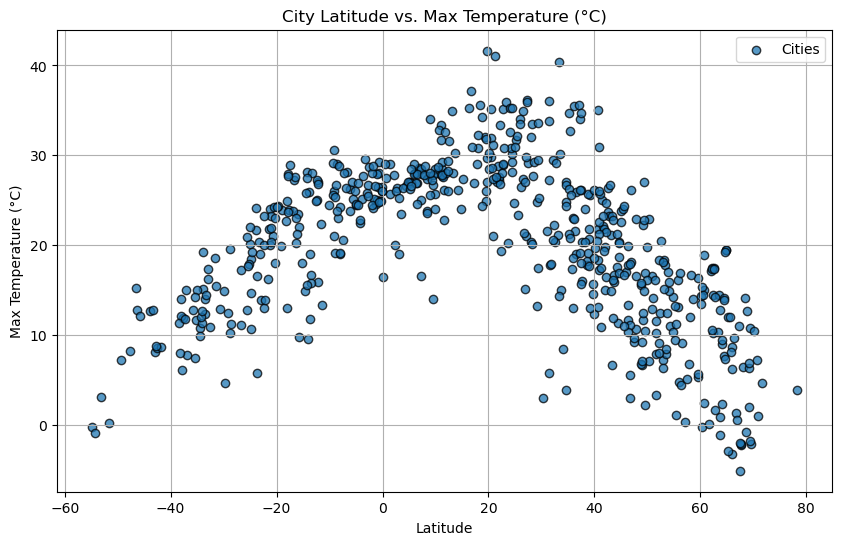

In [12]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="k", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("../output_data/Fig1.png")

#### Latitude Vs. Humidity

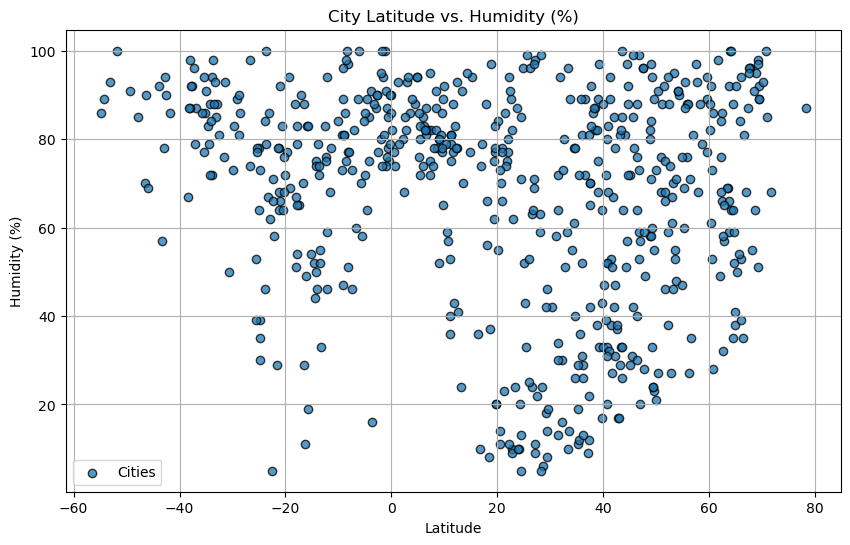

In [13]:
# Build scatter plot for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="k", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

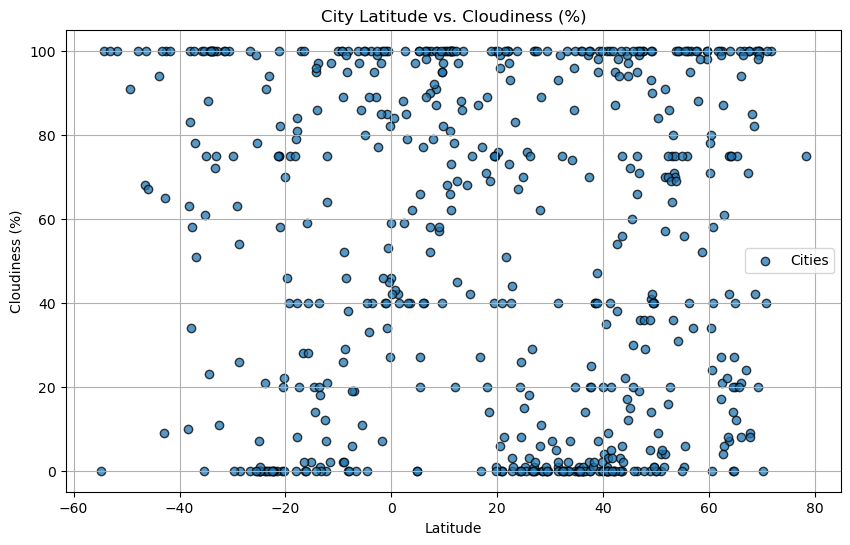

In [20]:
# Build scatter plot for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="k", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

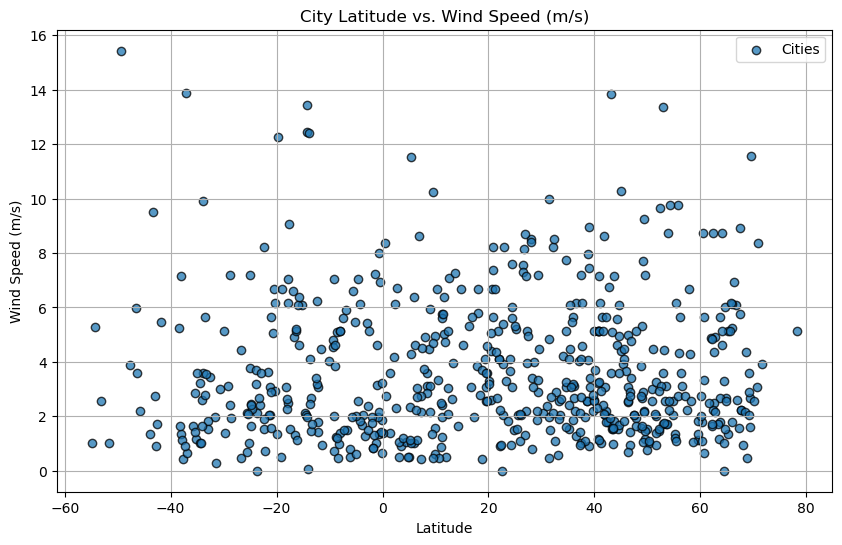

In [24]:
# Build scatter plot for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="k", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


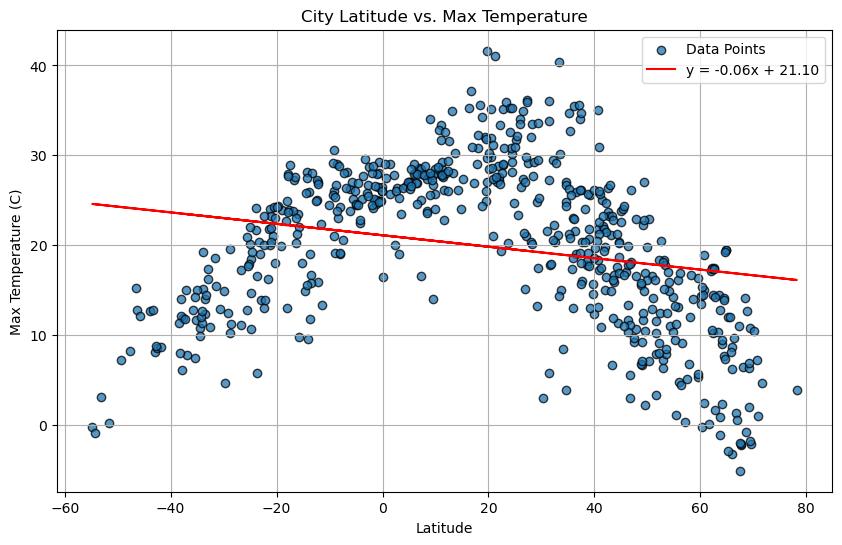

In [31]:
# Define a function to create Linear Regression plots


def plot_linear_regression(x_values, y_values, x_label, y_label, title, plot_filename):
    """
    Create a scatter plot with a linear regression line and save the plot.
    
    Parameters:
    - x_values: array-like, the x values for the scatter plot.
    - y_values: array-like, the y values for the scatter plot.
    - x_label: str, the label for the x-axis.
    - y_label: str, the label for the y-axis.
    - title: str, the title of the plot.
    - plot_filename: str, the filename to save the plot.
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Create the regression line values
    regression_line = slope * x_values + intercept
    
    # Plot the scatter plot and the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolor="k", alpha=0.75, label="Data Points")
    plt.plot(x_values, regression_line, color="r", label=f"y = {slope:.2f}x + {intercept:.2f}")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    

plot_linear_regression(city_data_df["Lat"], city_data_df["Max Temp"], 
                       "Latitude", "Max Temperature (C)", 
                       "City Latitude vs. Max Temperature", 
                       "output_data/Lat_vs_Temp_Linear_Regression.png")
# Save the figure
plt.savefig("../output_data/Fig4.png")
    
# Show plot
plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()
print(northern_hemi_df.head())

               City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                  
1          thompson  55.7435  -97.8558     13.09        76          75   
3         blackfoot  43.1905 -112.3450     21.14        29           3   
4         lakhdaria  36.5646    3.5933     19.04        89          14   
6        obsharovka  53.1250   48.8531     18.37        70          80   
7            albany  42.6001  -73.9662     23.65        37          38   

         Wind Speed Country        Date  
City_ID                                  
1              9.77      CA  1717188614  
3              3.58      US  1717188614  
4              1.28      DZ  1717188615  
6              4.44      RU  1717188615  
7              1.79      US  1717188451  


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.05,79,78,13.88,SH,1717188614
2,puerto natales,-51.7236,-72.4875,0.25,100,100,1.03,CL,1717188614
5,uturoa,-16.7333,-151.4333,27.25,70,28,4.93,PF,1717188615
8,balikpapan,-1.2675,116.8289,24.55,100,40,1.03,ID,1717188334
9,adamstown,-25.0660,-130.1015,20.17,64,7,3.76,PN,1717188615


###  Temperature vs. Latitude Linear Regression Plot

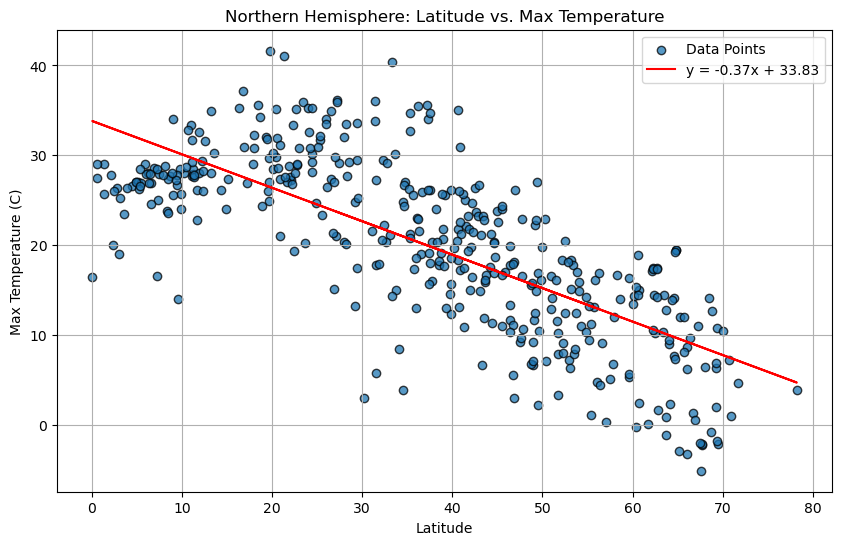

In [34]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"], 
    "Latitude", 
    "Max Temperature (C)", 
    "Northern Hemisphere: Latitude vs. Max Temperature", 
    "output_data/Northern_Hemisphere_Lat_vs_Max_Temp_Linear_Regression.png"
)


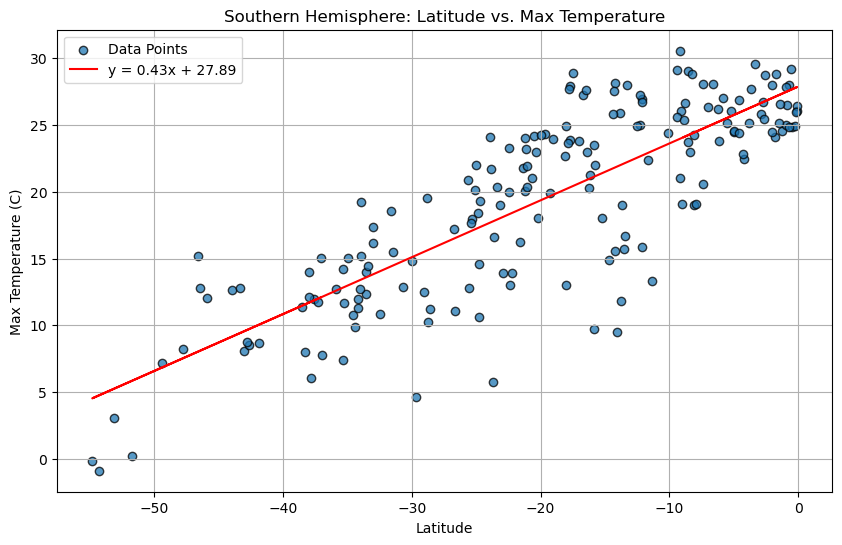

In [35]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"], 
    "Latitude", 
    "Max Temperature (C)", 
    "Southern Hemisphere: Latitude vs. Max Temperature", 
    "output_data/Southern_Hemisphere_Lat_vs_Max_Temp_Linear_Regression.png"
)

**Discussion about the linear relationship:** 

Latitude vs. Temperature

The linear regression analysis between latitude and maximum temperature in the Northern Hemisphere typically shows a negative correlation. This indicates that the maximum temperature tends to decrease as one moves further from the equator (increasing latitude). However, it is expected because regions closer to the poles receive less direct sunlight than equatorial regions, resulting in lower temperatures. Southern Hemisphere: Similarly, there is a negative correlation between latitude and maximum temperature in the Southern Hemisphere. Temperature generally decreases as latitude increases (moving towards the South Pole). However, the Southern Hemisphere might show a different slope in the regression line than the Northern Hemisphere due to the different land-water distribution and the influence of ocean currents. Both hemispheres exhibit a clear trend of decreasing temperature with increasing latitude, consistent with the concept of solar insolation, where the amount of solar energy received decreases as one moves toward the poles. The strength of the correlation is determined by how tightly the data points fit the regression line, which might differ due to geographical and climatic differences between the hemispheres.



### Humidity vs. Latitude Linear Regression Plot

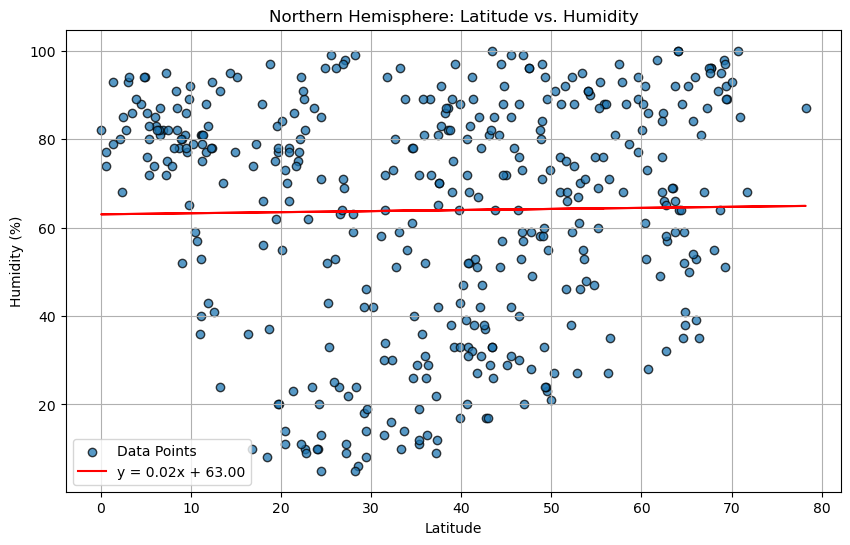

In [37]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"], 
    "Latitude", 
    "Humidity (%)", 
    "Northern Hemisphere: Latitude vs. Humidity", 
    "output_data/Northern_Hemisphere_Lat_vs_Humidity_Linear_Regression.png"
)

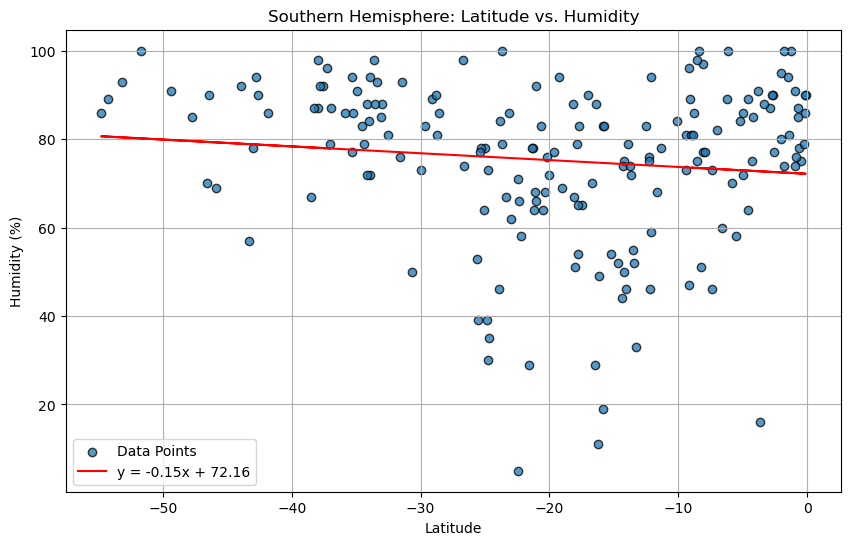

In [38]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"], 
    "Latitude", 
    "Humidity (%)", 
    "Southern Hemisphere: Latitude vs. Humidity", 
    "output_data/Southern_Hemisphere_Lat_vs_Humidity_Linear_Regression.png"
)

**Discussion about the linear relationship:** 

Latitude vs. Humidity

The relationship between latitude and humidity in the Northern Hemisphere can be more complex and less direct. Humidity levels are influenced by proximity to oceans, prevailing wind patterns, and topography. However, there may be a general trend where tropical regions near the equator have higher humidity while polar regions have lower humidity. The trend can be similar in the Southern Hemisphere but may vary more significantly due to the vast oceanic area compared to the Northern Hemisphere. Oceanic regions tend to have higher humidity due to evaporation, which can affect the overall linear relationship. Both hemispheres show variability in the humidity data, and while a broad trend might be observed, local geographic and climatic conditions play a significant role. The Southern Hemisphere’s larger ocean coverage could lead to a more pronounced influence of marine air masses on humidity


### Cloudiness vs. Latitude Linear Regression Plot

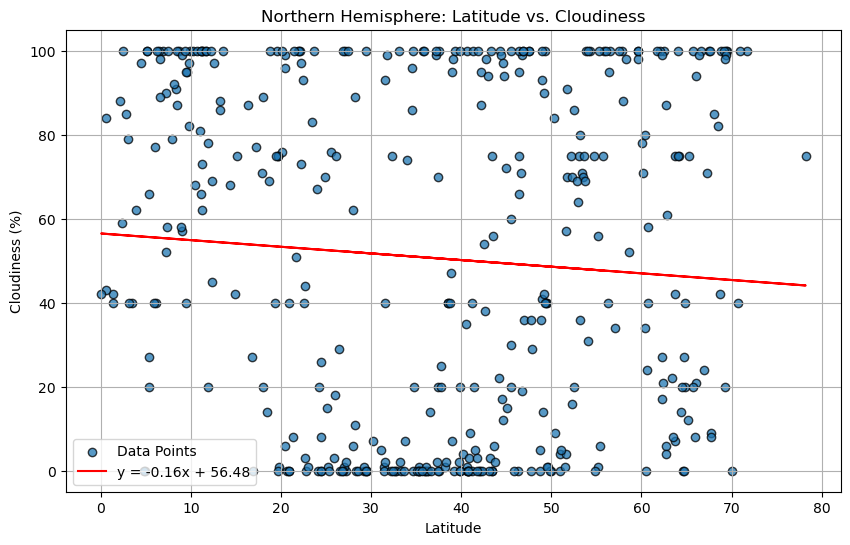

In [39]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"], 
    "Latitude", 
    "Cloudiness (%)", 
    "Northern Hemisphere: Latitude vs. Cloudiness", 
    "output_data/Northern_Hemisphere_Lat_vs_Cloudiness_Linear_Regression.png"
)

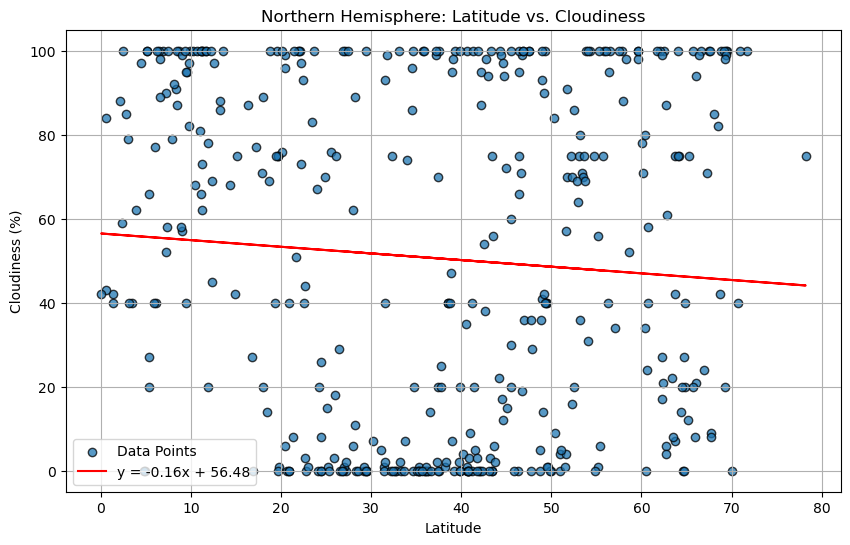

In [40]:
# Southern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"], 
    "Latitude", 
    "Cloudiness (%)", 
    "Northern Hemisphere: Latitude vs. Cloudiness", 
    "output_data/Northern_Hemisphere_Lat_vs_Cloudiness_Linear_Regression.png"
)

**Discussion about the linear relationship:**
Latitude vs. Cloudiness

Cloudiness in the Northern Hemisphere might show patterns related to climatic zones. For instance, tropical regions might have high cloudiness due to convection and rainfall, while mid-latitude regions experience varying cloudiness due to weather systems. Cloudiness patterns in the Southern Hemisphere are similarly influenced by oceanic and atmospheric circulation. The Southern Ocean, for instance, is known for persistent cloud cover. Both hemispheres display cloudiness patterns influenced by their respective climatic zones and circulation patterns. The relationship might not be strongly linear due to the seasonal and regional variability in cloud formation processes.


### Wind Speed vs. Latitude Linear Regression Plot

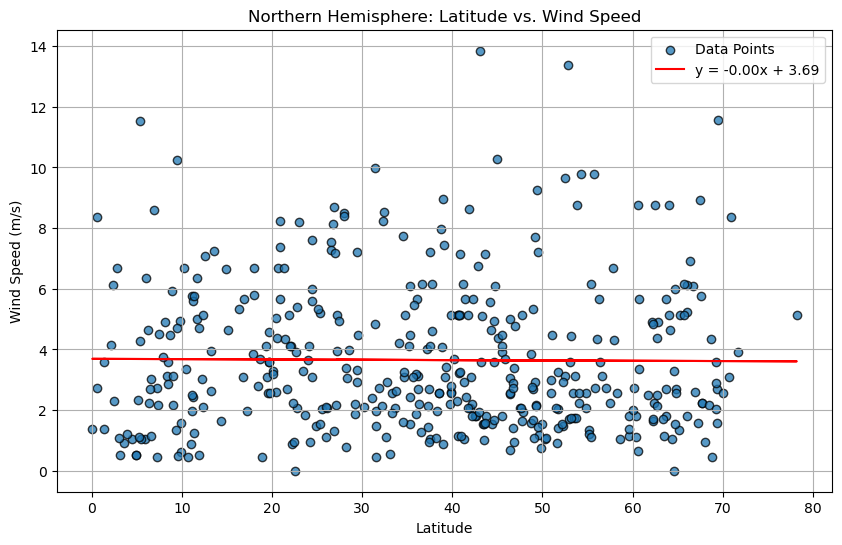

In [41]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    "Latitude", 
    "Wind Speed (m/s)", 
    "Northern Hemisphere: Latitude vs. Wind Speed", 
    "output_data/Northern_Hemisphere_Lat_vs_Wind_Speed_Linear_Regression.png"
)

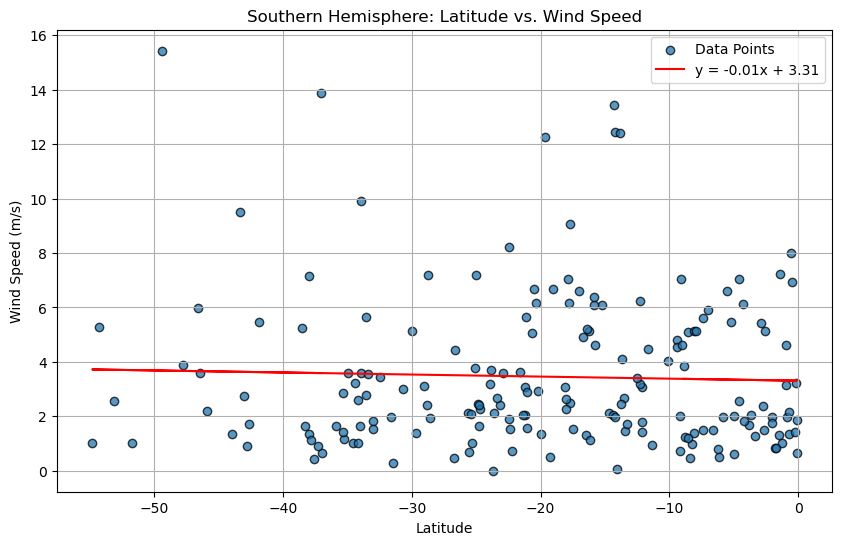

In [42]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Wind Speed"], 
    "Latitude", 
    "Wind Speed (m/s)", 
    "Southern Hemisphere: Latitude vs. Wind Speed", 
    "output_data/Southern_Hemisphere_Lat_vs_Wind_Speed_Linear_Regression.png"
)

**Discussion about the linear relationship:**
Latitude vs. Wind Speed

Wind speed in the Northern Hemisphere can vary with latitude and is influenced by atmospheric circulation patterns like jet streams, trade winds, and westerlies. Due to the presence of jet streams, higher wind speeds might be observed in mid-latitude regions. The Southern Hemisphere, with its vast oceanic expanse, often experiences higher wind speeds over the Southern Ocean, influenced by the circumpolar westerlies. Both hemispheres show that wind speed is influenced by latitude, but the relationship is also significantly affected by atmospheric circulation patterns. The Southern Hemisphere's unique geography, with its continuous band of ocean around the Antarctic, might result in different wind speed patterns compared to the Northern Hemisphere.
